## 1. 데이터 준비

### 1) 데이터 로드 : dataframe

In [1]:
import gc
gc.collect()

54

In [2]:
data_dir = "./data/"
train_data = data_dir + "encoded-spam.csv"

In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv(train_data)

In [5]:
train_df.shape

(4652, 51)

In [6]:
train_df.head()

,label,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0,1,77,9,22,67,95,1,13,11,...,0,0,0,0,0,0,0,0,0,0
1,1,14,1,325,13,1,342,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,56,1,1,76,352,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,223,140,15,215,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,13,6,204,61,9,6,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# train_df.info()

In [8]:
# train_df.describe()

### 2) data balancing : Downsampling 

In [9]:
# Get all the ham and spam
ham_msg = train_df[train_df.label == 0]
spam_msg = train_df[train_df.label == 1]

In [10]:
ham_msg

,label,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0,1,77,9,22,67,95,1,13,11,...,0,0,0,0,0,0,0,0,0,0
2,0,56,1,1,76,352,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,223,140,15,215,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,13,6,204,61,9,6,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,86,10,58,58,1,169,70,10,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4647,0,223,2,250,1,32,24,1,2,276,...,0,0,0,0,0,0,0,0,0,0
4648,0,101,116,4,138,5,58,66,17,5,...,0,0,0,0,0,0,0,0,0,0
4649,0,2,1,47,4,56,1,12,69,138,...,0,0,0,0,0,0,0,0,0,0
4650,0,58,1,12,69,47,22,88,2,116,...,0,0,0,0,0,0,0,0,0,0


In [11]:
spam_msg

,label,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
1,1,14,1,325,13,1,342,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,1,200,37,22,275,3,201,7,1,295,...,0,0,0,0,0,0,0,0,0,0
14,1,200,37,22,275,3,201,4,172,1,...,0,0,0,0,0,0,0,0,0,0
16,1,1,1,1,1,1,22,1,3,365,...,0,0,0,0,0,0,0,0,0,0
19,1,14,1,1,1,10,1,13,1,72,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,1,1,1,1,1,1,1,384,1,1,...,0,0,0,0,0,0,0,0,0,0
4607,1,4,17,127,477,260,236,1,48,1,...,0,0,0,0,0,0,0,0,0,0
4618,1,4,17,208,5,285,1,441,29,389,...,0,0,0,0,0,0,0,0,0,0
4626,1,172,356,21,137,41,1,1,16,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg

In [13]:
ham_msg_df

,label,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
983,0,96,283,3,6,1,8,336,36,60,...,0,0,0,0,0,0,0,0,0,0
2198,0,10,15,51,35,2,1,6,122,108,...,0,0,0,0,0,0,0,0,0,0
3715,0,1,138,5,58,66,17,4,1,3,...,0,0,0,0,0,0,0,0,0,0
4516,0,2,62,1,18,61,4,67,0,0,...,0,0,0,0,0,0,0,0,0,0
2974,0,99,9,330,96,19,133,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,0,1,12,1,393,88,87,7,1,1,...,0,0,0,0,0,0,0,0,0,0
2543,0,47,1,22,4,452,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3849,0,375,12,462,160,70,246,79,21,467,...,0,0,0,0,0,0,0,0,0,0
1646,0,9,6,313,102,320,83,1,25,63,...,0,0,0,0,0,0,0,0,0,0


In [14]:
spam_msg_df

,label,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
1,1,14,1,325,13,1,342,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,1,200,37,22,275,3,201,7,1,295,...,0,0,0,0,0,0,0,0,0,0
14,1,200,37,22,275,3,201,4,172,1,...,0,0,0,0,0,0,0,0,0,0
16,1,1,1,1,1,1,22,1,3,365,...,0,0,0,0,0,0,0,0,0,0
19,1,14,1,1,1,10,1,13,1,72,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,1,1,1,1,1,1,1,384,1,1,...,0,0,0,0,0,0,0,0,0,0
4607,1,4,17,127,477,260,236,1,48,1,...,0,0,0,0,0,0,0,0,0,0
4618,1,4,17,208,5,285,1,441,29,389,...,0,0,0,0,0,0,0,0,0,0
4626,1,172,356,21,137,41,1,1,16,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
print(ham_msg_df.shape, spam_msg_df.shape)

(582, 51) (582, 51)


In [16]:
# Create a dataframe with these ham and spam msg
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)

In [17]:
msg_df

,label,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,0,96,283,3,6,1,8,336,36,60,...,0,0,0,0,0,0,0,0,0,0
1,0,10,15,51,35,2,1,6,122,108,...,0,0,0,0,0,0,0,0,0,0
2,0,1,138,5,58,66,17,4,1,3,...,0,0,0,0,0,0,0,0,0,0
3,0,2,62,1,18,61,4,67,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,99,9,330,96,19,133,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,1,1,1,1,1,1,1,384,1,1,...,0,0,0,0,0,0,0,0,0,0
1160,1,4,17,127,477,260,236,1,48,1,...,0,0,0,0,0,0,0,0,0,0
1161,1,4,17,208,5,285,1,441,29,389,...,0,0,0,0,0,0,0,0,0,0
1162,1,172,356,21,137,41,1,1,16,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
msg_df_shuffled = msg_df.sample(frac=1).reset_index(drop=True)

In [19]:
msg_df_shuffled

,label,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,1,19,1,1,3,1,1,323,239,73,...,0,0,0,0,0,0,0,0,0,0
1,1,125,1,1,21,137,40,1,370,28,...,0,0,0,0,0,0,0,0,0,0
2,0,124,7,489,17,1,14,316,1,54,...,0,0,0,0,0,0,0,0,0,0
3,0,2,26,53,88,2,496,21,211,12,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,219,1,1,1,1,470,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,1,142,6,64,238,9,416,3,159,1,...,0,0,0,0,0,0,0,0,0,0
1160,1,125,1,109,1,3,1,40,10,90,...,0,0,0,0,0,0,0,0,0,0
1161,0,101,63,1,27,7,143,11,5,1,...,0,0,0,0,0,0,0,0,0,0
1162,0,83,356,67,35,4,1,1,4,34,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train_X = msg_df_shuffled.iloc[:, 1:]
train_Y = msg_df_shuffled.iloc[:, 0:1]

### 3) 모델 구성

In [21]:
import json
from tensorflow.python.keras.preprocessing.text import Tokenizer, tokenizer_from_json

In [22]:
tokenized_file = data_dir + 'tokenized.json'

tok_configs = None
with open(tokenized_file, 'r') as f:
    data = json.load(f)
    tokenizer = tokenizer_from_json(data)

In [23]:
# Defining pre-processing hyperparameters
max_len = train_X.shape[1]
vocab_size = tokenizer.get_config()['num_words']

In [24]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model

In [25]:
# Keras의 Function API를 사용하여 모델 구성
def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(vocab_size, 50, input_length=max_len)(inputs) # 단어 벡터를 밀집 벡터로 임베딩
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    
    model = Model(inputs=inputs, outputs=layer)
    return model

In [26]:
model = RNN()

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 50)            25000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [29]:
history = model.fit(train_X, train_Y, batch_size=32, epochs=16,
          validation_split=0.1)

Train on 1047 samples, validate on 117 samples
Epoch 1/16
1047/1047 [==============================] - 4s 3ms/sample - loss: 0.6932 - acc: 0.5129 - val_loss: 0.6934 - val_acc: 0.4872
Epoch 2/16
1047/1047 [==============================] - 1s 814us/sample - loss: 0.6748 - acc: 0.5731 - val_loss: 0.4498 - val_acc: 0.8205
Epoch 3/16
1047/1047 [==============================] - 1s 824us/sample - loss: 0.3179 - acc: 0.9102 - val_loss: 0.4174 - val_acc: 0.8547
Epoch 4/16
1047/1047 [==============================] - 1s 815us/sample - loss: 0.2898 - acc: 0.9255 - val_loss: 0.2779 - val_acc: 0.8889
Epoch 5/16
1047/1047 [==============================] - 1s 814us/sample - loss: 0.1826 - acc: 0.9484 - val_loss: 0.2581 - val_acc: 0.8889
Epoch 6/16
1047/1047 [==============================] - 1s 806us/sample - loss: 0.1708 - acc: 0.9532 - val_loss: 0.1206 - val_acc: 0.9658
Epoch 7/16
1047/1047 [==============================] - 1s 817us/sample - loss: 0.1276 - acc: 0.9637 - val_loss: 0.1143 - val_a

In [30]:
import matplotlib.pyplot as plt

In [31]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'acc': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

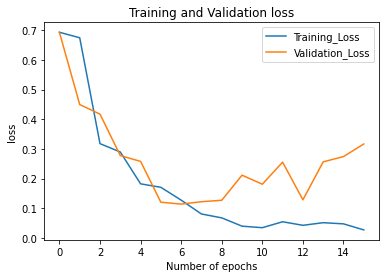

In [32]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

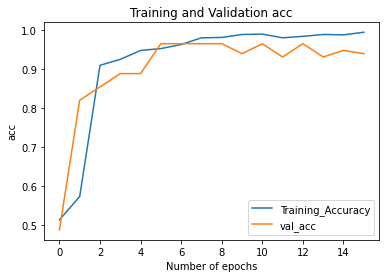

In [33]:
plot_graphs1('Training_Accuracy', 'val_acc', 'acc')

### 4) test ; 추론(inference)

In [34]:
test_encoded_data = data_dir + "encoded-spam-test.csv"
test_encoded_df = pd.read_csv(test_encoded_data)

In [35]:
# Model performance on test data 
model.evaluate(test_encoded_df.iloc[:, 1:], test_encoded_df.iloc[:, 0:1])

517/517 [==============================] - 0s 203us/sample - loss: 0.3325 - acc: 0.9304


[0.33245458436149894, 0.9303675]

In [36]:
test_spam_encoded_df = test_encoded_df[test_encoded_df.label == 1]

In [37]:
model.evaluate(test_spam_encoded_df.iloc[:, 1:], test_spam_encoded_df.iloc[:, 0:1])

71/71 [==============================] - 0s 333us/sample - loss: 0.3706 - acc: 0.9437


[0.37059828151069896, 0.943662]

In [38]:
from tensorflow.keras.preprocessing import sequence

In [39]:
def spam_predict(new_sentence):
  # new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  # new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = sequence.pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model.predict(pad_new)) # 예측
  print(score, '\n')
  if(score > 0.5):
    print("{:.2f}% 확률로 스팸입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 햄입니다.\n".format((1 - score) * 100))

In [40]:
spam_predict("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

0.0014543668366968632 

99.85% 확률로 햄입니다.



In [41]:
spam_predict("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

0.7366210222244263 

73.66% 확률로 스팸입니다.



In [42]:
spam_predict("Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX")

0.002112621208652854 

99.79% 확률로 햄입니다.



In [43]:
test_data = data_dir + "spam.csv"

In [44]:
test_df = pd.read_csv(test_data, encoding='latin-1')

In [45]:
test_spam_df = test_df[test_df.v1 == 'spam']

In [46]:
test_spam_df['v2']

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: v2, Length: 747, dtype: object

In [47]:
spam_predict(test_spam_df['v2'][11])

0.9606184363365173 

96.06% 확률로 스팸입니다.



In [48]:
test_spam_df['v2'][5537]

'Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX'

In [49]:
spam_predict('Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX')

0.002112621208652854 

99.79% 확률로 햄입니다.



In [50]:
spam_predict(test_spam_df['v2'][5537])

0.002112621208652854 

99.79% 확률로 햄입니다.



In [51]:
spam_predict(test_spam_df['v2'][5547])

0.04572828859090805 

95.43% 확률로 햄입니다.



In [52]:
spam_predict(test_spam_df['v2'][5566])

0.05857749655842781 

94.14% 확률로 햄입니다.

